# Evalution Project 5-- Census_Income

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


income-target  column

In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Understanding the Datasets:

There are 15 columns in the dataset namely

The database includes the following indicators:

    
Age-----age of the people
Workclass--- class of the people where they works
Fnlwgt---It is a final weight
Education----  Education of candidate
Education_num--- Educatio number of candidate
Marital_status---- Marital status of candidate
Occupation---- Occupation of the candiddate
Relationship--- Relationship of cadidate with family member
Race  --- Race of the candidate whether it is black or white 
Sex -----Sex of the candidate
Capital_gain--- capital gain of the population
Capital_loss---- capital loss of the population
Hours_per_week--- working hours
Native_country--- Country
Income--- income of the population.

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Checking the unique values

In [5]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [6]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
df['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [8]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [9]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [11]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [12]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [13]:
df['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [14]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [15]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [16]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
df=df.replace(' ?',np.nan)

In [19]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Data Visualization

for Categorical Features we will use count plot it will give frequecy of the classes


Workclass
Education
Marital_status
Occupation	
Relationship
Race	
Sex
Native_country	
Income

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


<AxesSubplot:xlabel='Workclass', ylabel='count'>

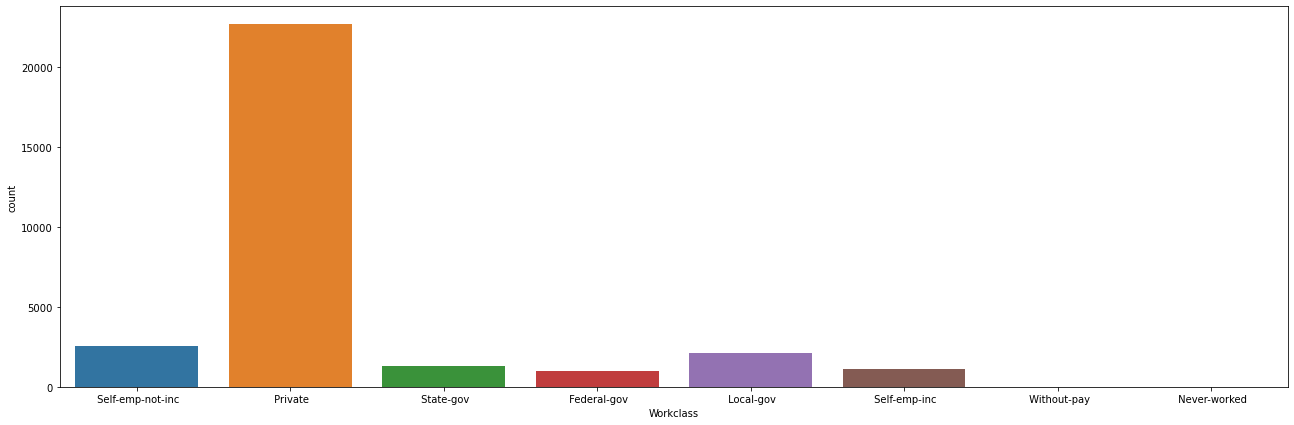

In [20]:
ax=df['Workclass'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Workclass'])


from the above observation, it is observed that Workclass for the people is 

 Private             
 Self-emp-not-inc    
 Local-gov           
 State-gov           
 Self-emp-inc        
 Federal-gov         
 Without-pay         
 Never-worked 


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

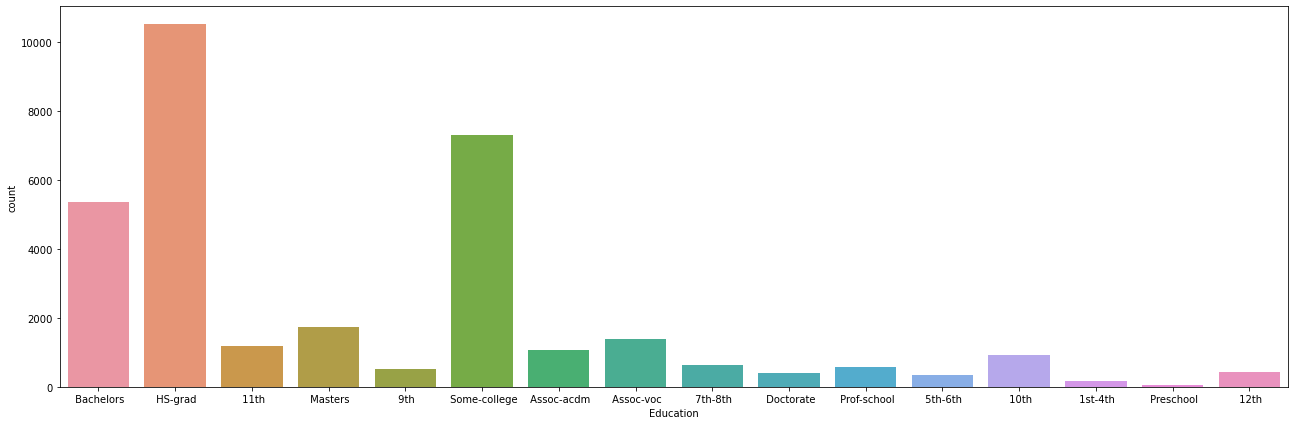

In [21]:
ax=df['Education'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Education'])

from the above observation, it is observed that Education of the people is 

 HS-grad         
 Some-college     
 Bachelors        
 Masters          
 Assoc-voc        
 11th             
 Assoc-acdm       
 10th             
 7th-8th          
 Prof-school      
 9th              
 12th             
 Doctorate        
 5th-6th          
 1st-4th          
 Preschool   

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


<AxesSubplot:xlabel='Marital_status', ylabel='count'>

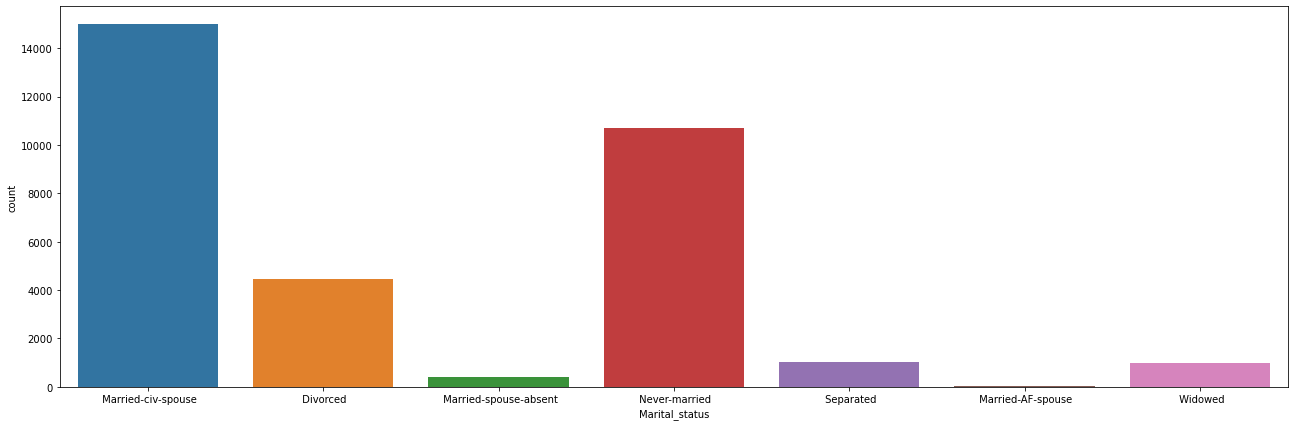

In [22]:
ax=df['Marital_status'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Marital_status'])

from the above observation, it is observed that Marital_status of the people is

 Married-civ-spouse       
 Never-married            
 Divorced                 
 Separated                
 Widowed                  
 Married-spouse-absent    
 Married-AF-spouse 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

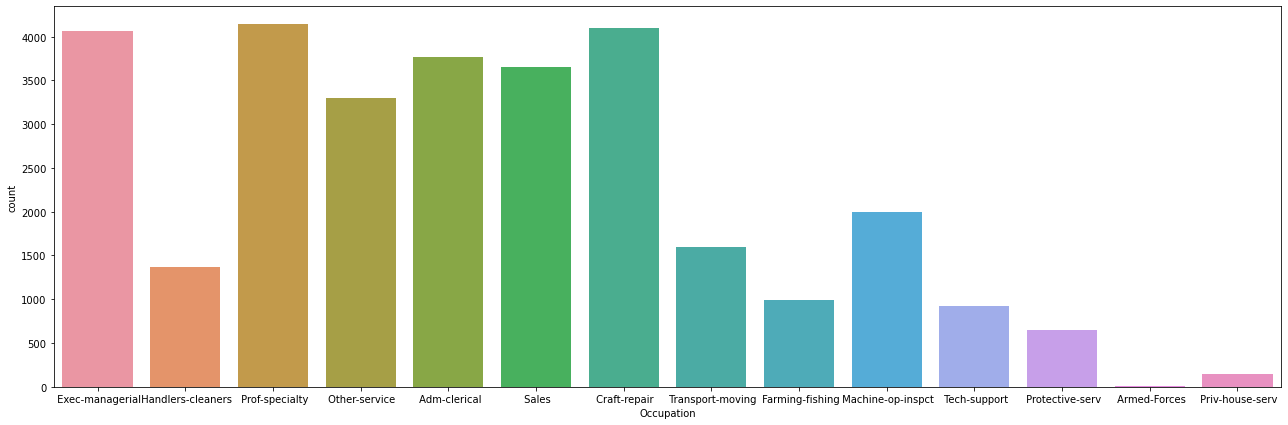

In [23]:
ax=df['Occupation'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Occupation'])

from the above observation, it is observed that Occupation of the people are

 Prof-specialty       
 Craft-repair        
 Exec-managerial     
 Adm-clerical        
 Sales               
 Other-service       
 Machine-op-inspct   
 Transport-moving    
 Handlers-cleaners   
 Farming-fishing     
 Tech-support        
 Protective-serv     
 Priv-house-serv     
 Armed-Forces 



 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


<AxesSubplot:xlabel='Relationship', ylabel='count'>

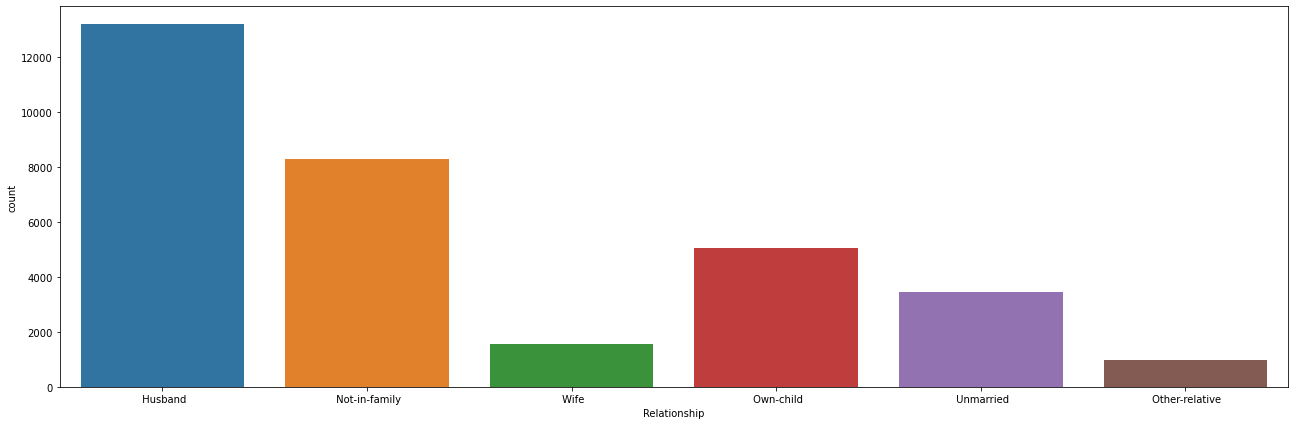

In [24]:
ax=df['Relationship'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Relationship'])

from the above observation, it is observed that relationship of the people is 

 Husband           
 Not-in-family     
 Own-child         
 Unmarried         
 Wife              
 Other-relative

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


<AxesSubplot:xlabel='Race', ylabel='count'>

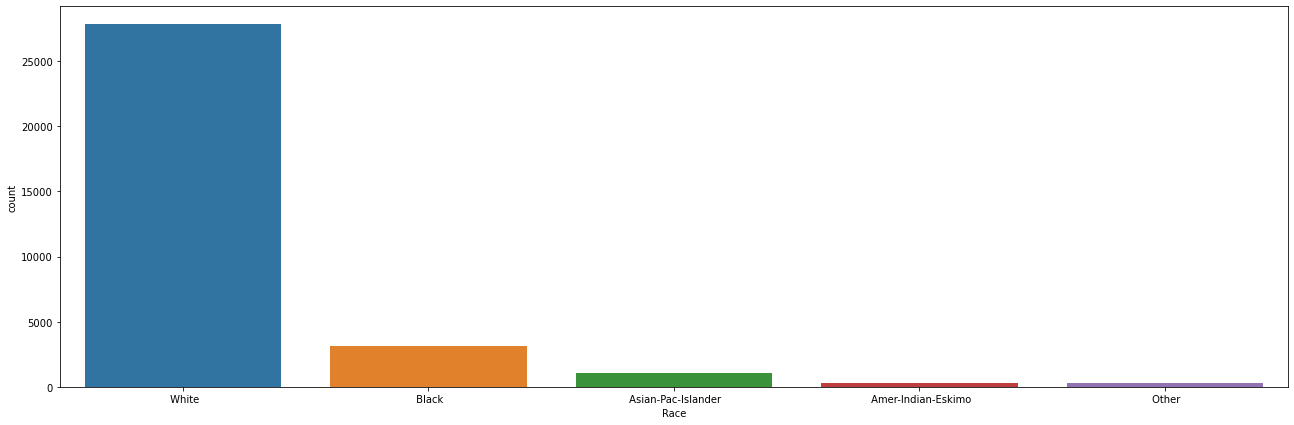

In [25]:
ax=df['Race'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Race'])

from the above observation, it is observed that most of people are with 'White' race community.

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

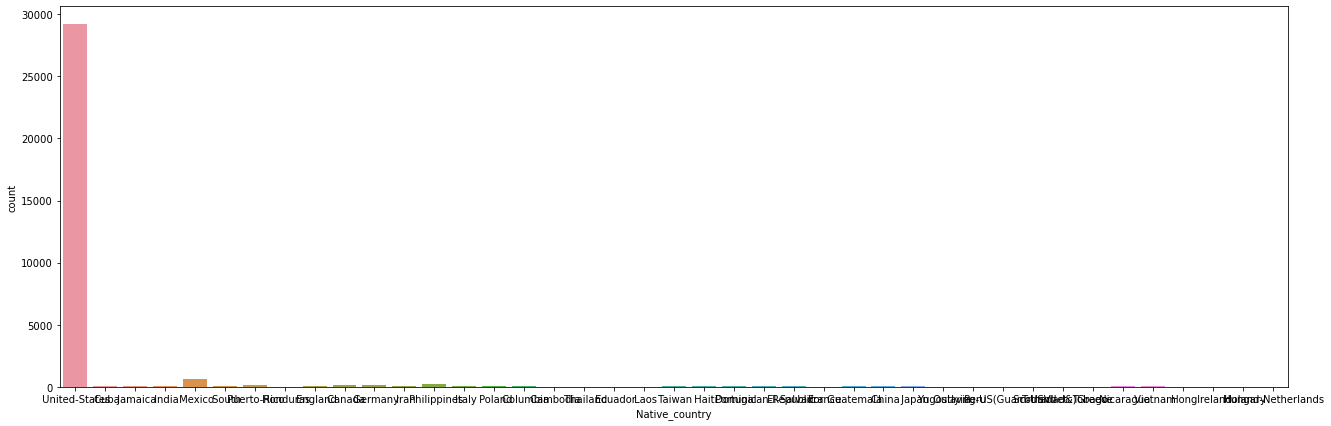

In [26]:
ax=df['Native_country'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Native_country'])

from the above observation, it is observed that most of people are from the country United-States.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

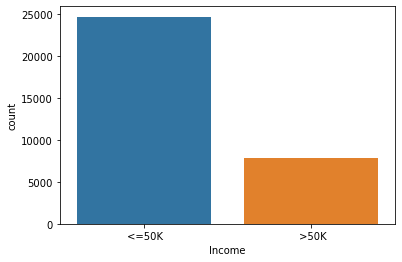

In [27]:
ax=df['Income'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(df['Income'])

from the above observation, it is observed that most of people income is of two types

1) <=50K    
2) > 50K 

In [28]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Encoding of the data

In [29]:
lencoder=LabelEncoder()
df['Workclass']=lencoder.fit_transform(df['Workclass'])
df['Education']=lencoder.fit_transform(df['Education'])
df['Marital_status']=lencoder.fit_transform(df['Marital_status'])
df['Occupation']=lencoder.fit_transform(df['Occupation'])
df['Relationship']=lencoder.fit_transform(df['Relationship'])
df['Race']=lencoder.fit_transform(df['Race'])
df['Sex']=lencoder.fit_transform(df['Sex'])
df['Native_country']=lencoder.fit_transform(df['Native_country'])
df['Income']=lencoder.fit_transform(df['Income'])

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [30]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [31]:
df['Native_country']=df['Native_country'].fillna(np.mean(df['Native_country']))
df['Occupation']=df['Occupation'].fillna(np.mean(df['Occupation']))
df['Workclass']=df['Workclass'].fillna(np.mean(df['Workclass']))

In [32]:
df['Income'].unique()

array([0, 1])

In [33]:
df['Native_country'].unique()

array([38,  4, 22, 18, 41, 25, 34, 32, 15,  8,  1, 10, 19, 29, 21, 30,  3,
        0, 36,  6, 24, 35, 13, 31,  5,  7,  9, 12,  2, 23, 40, 28, 27, 33,
       37, 11, 26, 39, 16, 20, 17, 14])

In [34]:
df['Occupation'].unique()

array([ 3,  5,  9,  7,  0, 11,  2, 13,  4,  6, 12, 14, 10,  1,  8])

In [35]:
df['Workclass'].unique()

array([5, 3, 6, 0, 1, 8, 4, 7, 2])

In [36]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


9     4140
2     4099
3     4066
0     3769
11    3650
7     3295
6     2002
14    1843
13    1597
5     1370
4      994
12     928
10     649
8      149
1        9
Name: Occupation, dtype: int64


<AxesSubplot:xlabel='Occupation', ylabel='count'>

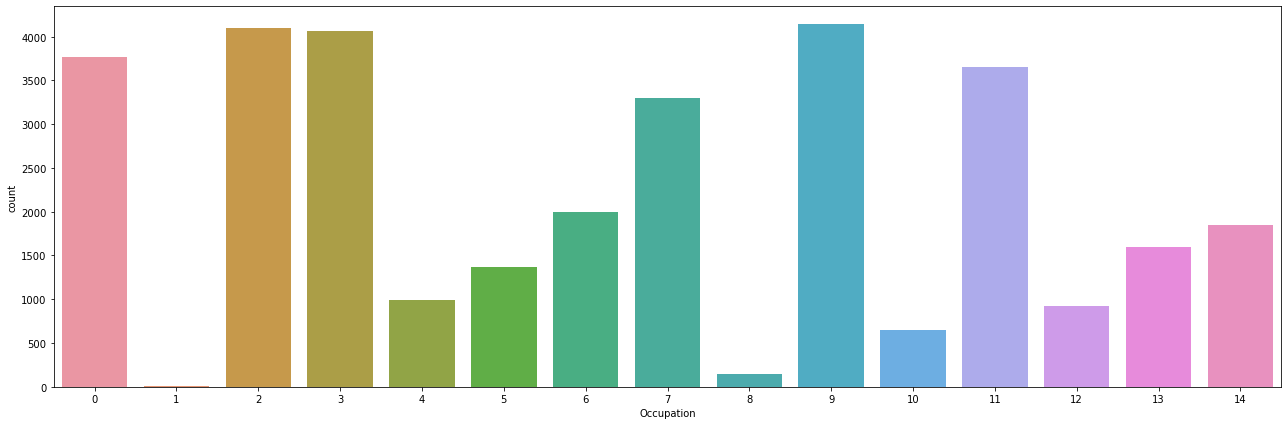

In [37]:
ax=df['Occupation'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Occupation'])

from the above observation, it is observed that there are 15 types of occupation people did.

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64


<AxesSubplot:xlabel='Capital_gain', ylabel='count'>

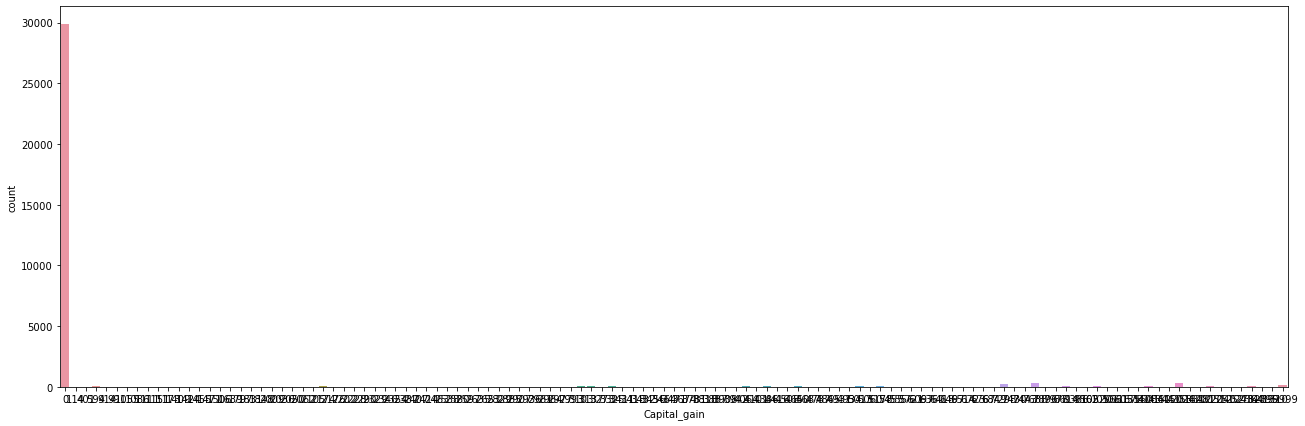

In [38]:
ax=df['Capital_gain'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Capital_gain'])

capital gain is upto 30000

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64


<AxesSubplot:xlabel='Capital_loss', ylabel='count'>

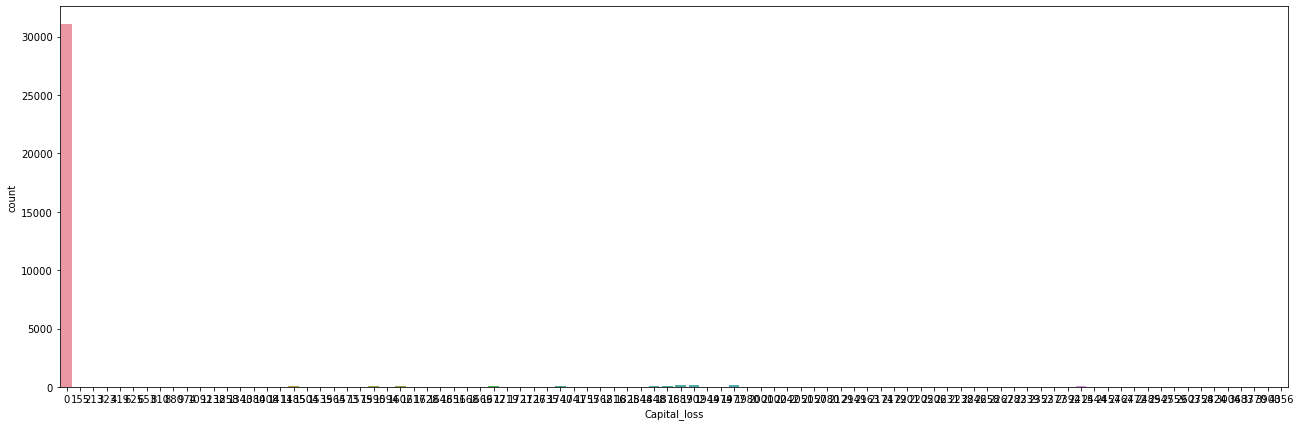

In [40]:
ax=df['Capital_loss'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(df['Capital_loss'])

capital loss is also 30000

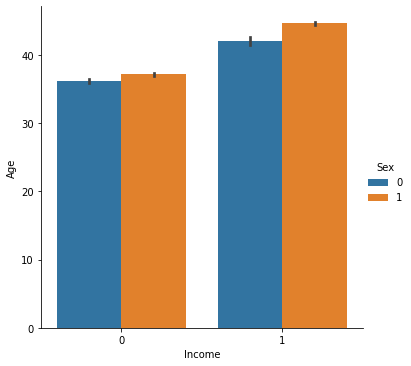

<Figure size 1584x504 with 0 Axes>

In [41]:
g=sns.catplot(y='Age',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that Male candidate is having more income

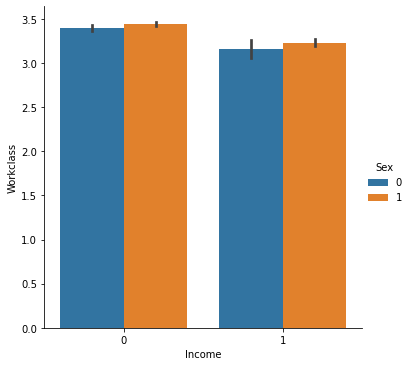

<Figure size 1584x504 with 0 Axes>

In [43]:
g=sns.catplot(y='Workclass',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that Male and female both candidate is having same income according to workclass.

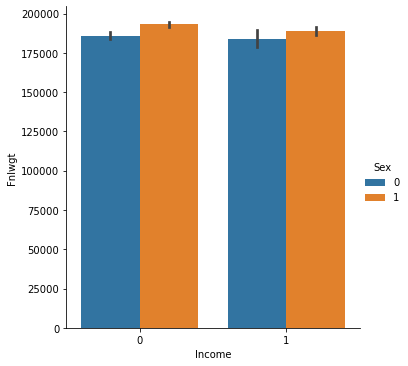

<Figure size 1584x504 with 0 Axes>

In [44]:
g=sns.catplot(y='Fnlwgt',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that Male candidate is having more final weight

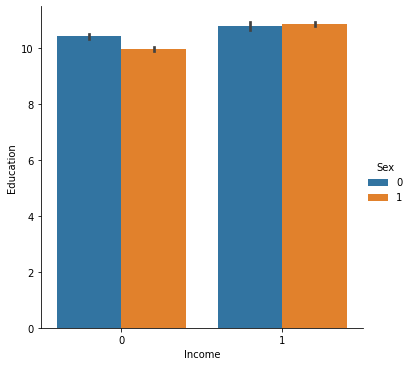

<Figure size 1584x504 with 0 Axes>

In [45]:
g=sns.catplot(y='Education',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that female candidate is having higher education.

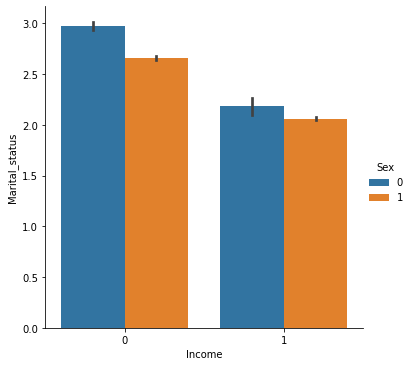

<Figure size 1584x504 with 0 Axes>

In [46]:
g=sns.catplot(y='Marital_status',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that female candidate is having more married than male candidate

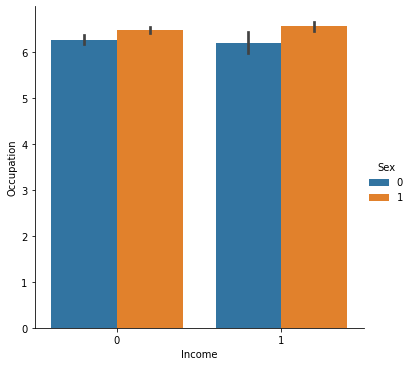

<Figure size 1584x504 with 0 Axes>

In [47]:
g=sns.catplot(y='Occupation',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that male candidate is having more job serviced than male candidate

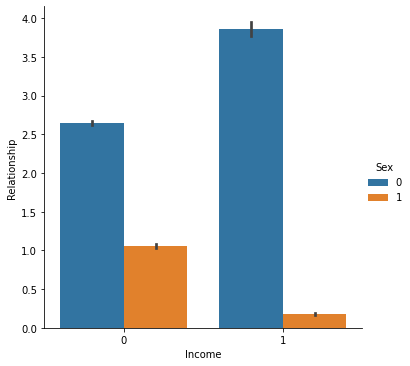

<Figure size 1584x504 with 0 Axes>

In [48]:
g=sns.catplot(y='Relationship',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that female candidate is with more relation 

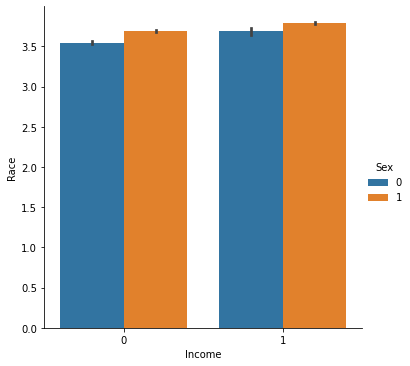

<Figure size 1584x504 with 0 Axes>

In [49]:
g=sns.catplot(y='Race',x='Income',hue='Sex',data=df,kind='bar')
plt.figure(figsize=(22,7))
plt.show()

from the above observation, it is observed that female and male candidate having same race.

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

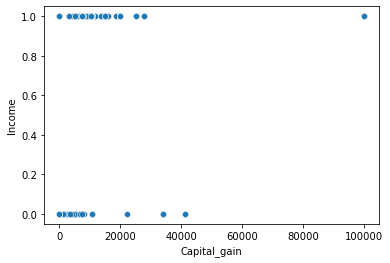

In [50]:
sns.scatterplot(x='Capital_gain',y='Income',data=df)

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

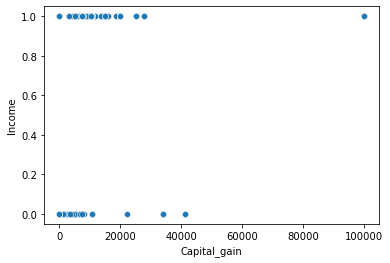

In [51]:
sns.scatterplot(x='Capital_gain',y='Income',data=df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

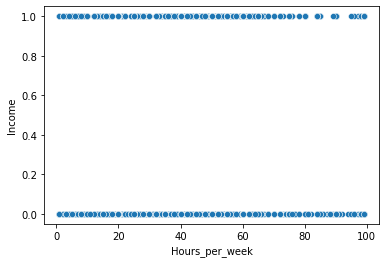

In [52]:
sns.scatterplot(x='Hours_per_week',y='Income',data=df)

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

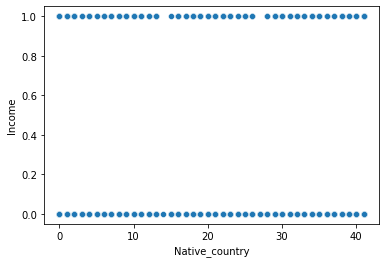

In [53]:
sns.scatterplot(x='Native_country',y='Income',data=df)

# Now we use subplot and displot to check data are normalised or not

In [54]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

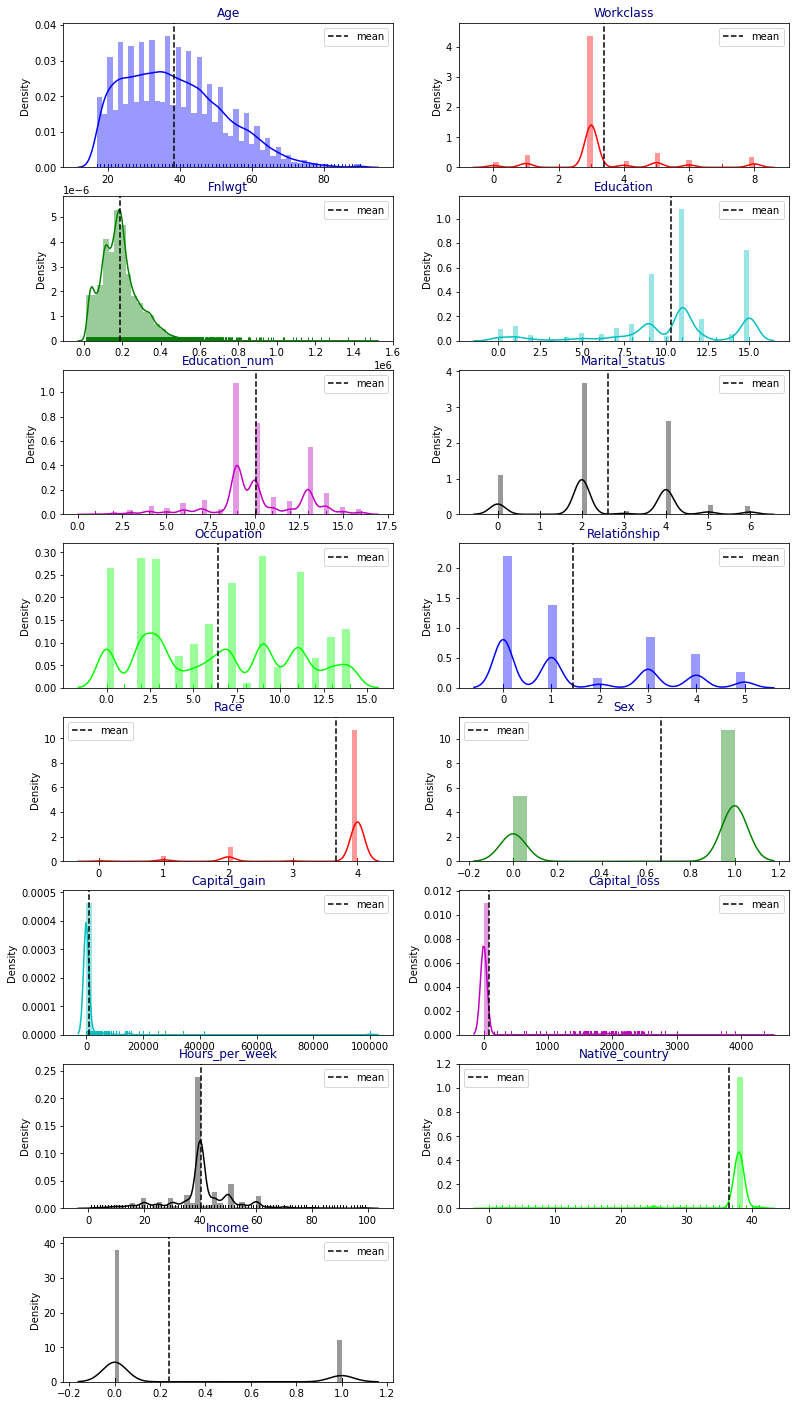

In [55]:
import itertools

cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b","r","g","c","m","k","lime","k"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

from the plot it is observed that data is not normalized

# Describe the dataset

In [57]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.421959,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.328539,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

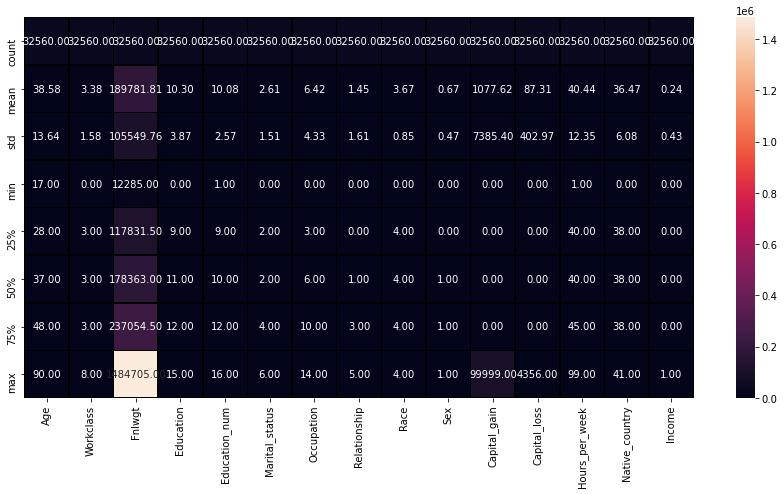

In [58]:
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


# Correlation of the columns with the target columns

In [59]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


<AxesSubplot:>

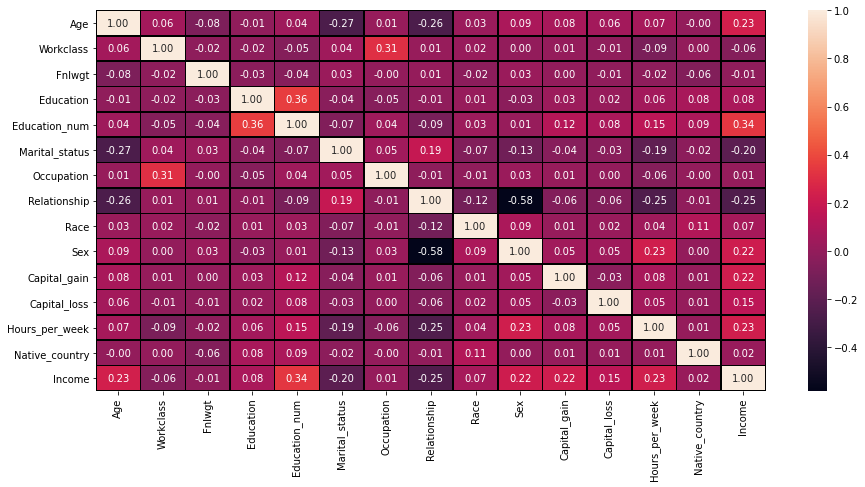

In [60]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


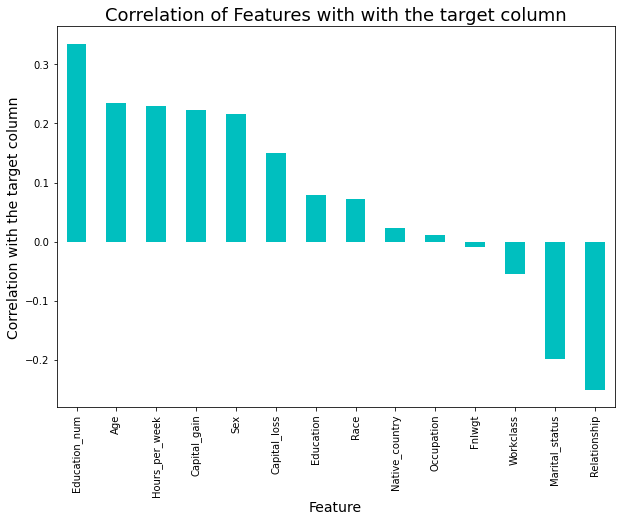

In [61]:
plt.figure(figsize=(10,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


multicollinearity is present hence to remove this we need to find vif 

In [73]:
dfx1=df.iloc[:,:-1]
dfx1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [74]:
dfy1=df.iloc[:,14:15]
dfy1

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [75]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
dfx1.shape

(32560, 14)

In [77]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [78]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Age,8.930030
1,Workclass,6.091408
2,Fnlwgt,4.039876
3,Education,9.231486
4,Education_num,18.612227
5,Marital_status,4.094403
6,Occupation,3.579010
7,Relationship,2.676956
8,Race,17.679562
9,Sex,4.466499


Native_country is having high vif hence we drop it.

In [101]:
df.drop(["Native_country"],axis=1,inplace=True)

In [102]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [103]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Age,7.511304
1,Workclass,5.904734
2,Fnlwgt,3.937050
3,Education,6.984473
4,Marital_status,3.805326
5,Occupation,3.506978
6,Relationship,2.460444
7,Sex,4.228559
8,Capital_gain,1.034105
9,Capital_loss,1.056962


Education_num is having high vif hence we dropthis column

In [104]:
df.drop(["Education_num"],axis=1,inplace=True)

In [105]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [106]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Age,7.511304
1,Workclass,5.904734
2,Fnlwgt,3.937050
3,Education,6.984473
4,Marital_status,3.805326
5,Occupation,3.506978
6,Relationship,2.460444
7,Sex,4.228559
8,Capital_gain,1.034105
9,Capital_loss,1.056962


Race is having high vif hence we drop it

In [108]:
df.drop(["Race"],axis=1,inplace=True)

In [109]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [110]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Age,7.511304
1,Workclass,5.904734
2,Fnlwgt,3.937050
3,Education,6.984473
4,Marital_status,3.805326
5,Occupation,3.506978
6,Relationship,2.460444
7,Sex,4.228559
8,Capital_gain,1.034105
9,Capital_loss,1.056962


# Skewness

In [111]:
df.skew()

Age                0.558738
Workclass          1.167293
Fnlwgt             1.446972
Education         -0.934063
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

From the above observation some columns falls under high skewness hence we need to remove the skewness

# Outliers Check:

<AxesSubplot:>

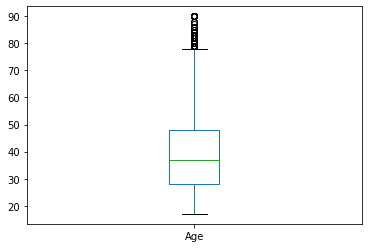

In [112]:
df['Age'].plot.box()

<AxesSubplot:>

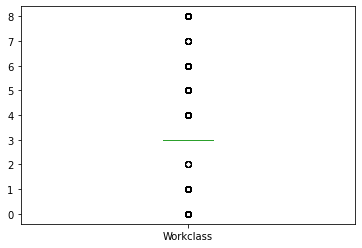

In [113]:
df['Workclass'].plot.box()

<AxesSubplot:>

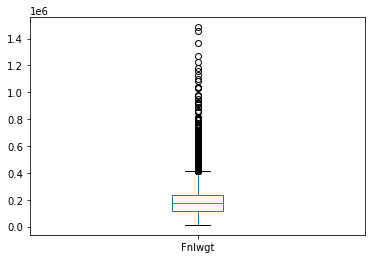

In [114]:
df['Fnlwgt'].plot.box()

<AxesSubplot:>

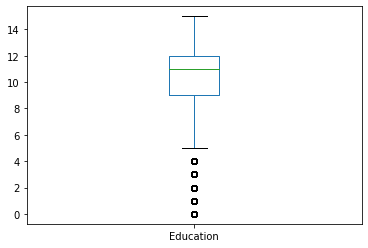

In [115]:
df['Education'].plot.box()

<AxesSubplot:>

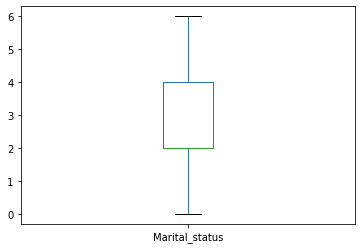

In [116]:
df['Marital_status'].plot.box()

<AxesSubplot:>

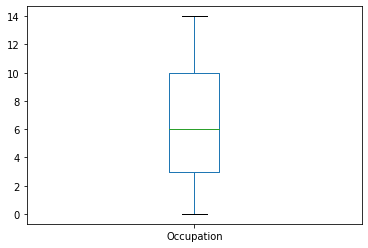

In [117]:
df['Occupation'].plot.box()

<AxesSubplot:>

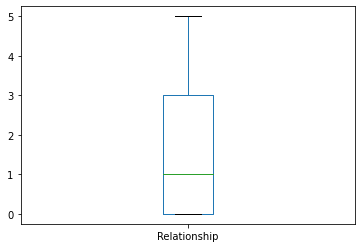

In [118]:
df['Relationship'].plot.box()

<AxesSubplot:>

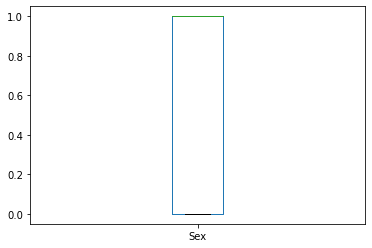

In [120]:
df['Sex'].plot.box()

<AxesSubplot:>

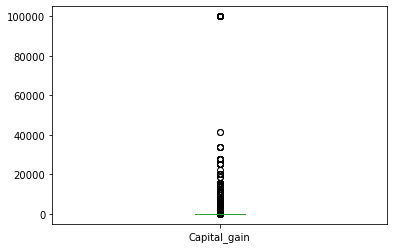

In [121]:
df['Capital_gain'].plot.box()

<AxesSubplot:>

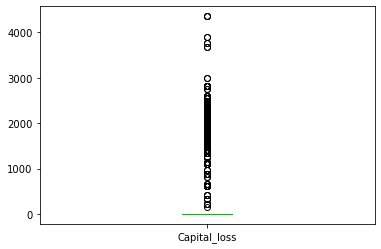

In [122]:
df['Capital_loss'].plot.box()

<AxesSubplot:>

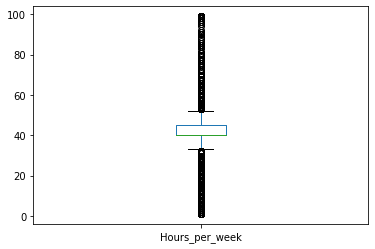

In [123]:
df['Hours_per_week'].plot.box()

# Outliers Removal

In [124]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64),
 array([10,  9, 10, ...,  0, 10, 10], dtype=int64))

In [125]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,5,83311,9,2,3,0,1,0,0,13,0
1,38,3,215646,11,0,5,1,1,0,0,40,0
2,53,3,234721,1,2,5,0,1,0,0,40,0
3,28,3,338409,9,2,9,5,0,0,0,40,0
4,37,3,284582,12,2,3,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,2,12,5,0,0,0,38,0
32556,40,3,154374,11,2,6,0,1,0,0,40,1
32557,58,3,151910,11,6,0,4,0,0,0,40,0
32558,22,3,201490,11,4,0,3,1,0,0,20,0


In [126]:
df.shape

(32560, 12)

# Percentage loss of data

In [127]:
percentage_loss=((32560-30028)/32560)*100
print(percentage_loss)

7.776412776412776


# Sparating the target and feature column

In [128]:
feature=df.drop("Income",axis=1)
target=df["Income"]
x=feature
y=target

In [129]:
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,5,83311,9,2,3,0,1,0,0,13
1,38,3,215646,11,0,5,1,1,0,0,40
2,53,3,234721,1,2,5,0,1,0,0,40
3,28,3,338409,9,2,9,5,0,0,0,40
4,37,3,284582,12,2,3,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,2,12,5,0,0,0,38
32556,40,3,154374,11,2,6,0,1,0,0,40
32557,58,3,151910,11,6,0,4,0,0,0,40
32558,22,3,201490,11,4,0,3,1,0,0,20


In [130]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

# Removing skewness of train dataset by transforming data

In [131]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling the data using the min max scaler

In [132]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.45205479, 0.625     , 0.0482376 , ..., 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.375     , 0.13811345, ..., 0.        , 0.        ,
        0.39795918],
       [0.49315068, 0.375     , 0.15106831, ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.375     , 0.09482688, ..., 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.375     , 0.12849934, ..., 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.5       , 0.18720338, ..., 0.1502415 , 0.        ,
        0.39795918]])

# Logistic Regression

In [133]:
lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training accuracy_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 31 The model performs very well
At random state:- 31
Training accuracy_score is:- 80.19425675675676
Testing accuracy_score is:- 80.20577395577395
At random state 37 The model performs very well
At random state:- 37
Training accuracy_score is:- 80.22496928746928
Testing accuracy_score is:- 80.17506142506143
At random state 82 The model performs very well
At random state:- 82
Training accuracy_score is:- 80.25568181818183
Testing accuracy_score is:- 80.25184275184274
At random state 87 The model performs very well
At random state:- 87
Training accuracy_score is:- 80.27871621621621
Testing accuracy_score is:- 80.29791154791155
At random state 90 The model performs very well
At random state:- 90
Training accuracy_score is:- 80.20577395577395
Testing accuracy_score is:- 80.20577395577395
At random state 119 The model performs very well
At random state:- 119
Training accuracy_score is:- 80.18273955773955
Testing accuracy_score is:- 80.17506142506143
At random state 134 The mo

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=289,test_size=0.20)

In [135]:
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[4392  535]
 [1415  170]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      4927
           1       0.24      0.11      0.15      1585

    accuracy                           0.70      6512
   macro avg       0.50      0.50      0.48      6512
weighted avg       0.63      0.70      0.66      6512



# Cross validation for logistic regression

In [136]:
from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,x,y,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.01535626535626
accuracy_score is :- 80.11363636363636


At cv:- 3
Cross validation score is:- 80.19042699103038
accuracy_score is :- 80.11363636363636


At cv:- 4
Cross validation score is:- 80.18120393120392
accuracy_score is :- 80.11363636363636


At cv:- 5
Cross validation score is:- 80.21191646191646
accuracy_score is :- 80.11363636363636


At cv:- 6
Cross validation score is:- 80.23036175418385
accuracy_score is :- 80.11363636363636


At cv:- 7
Cross validation score is:- 80.21808223059335
accuracy_score is :- 80.11363636363636


At cv:- 8
Cross validation score is:- 80.21191646191646
accuracy_score is :- 80.11363636363636


At cv:- 9
Cross validation score is:- 80.21498962350414
accuracy_score is :- 80.11363636363636




In [137]:
print("At cv:-",4)
print("Cross validation score is:-",80.181 )
print("Accuracy_score is :-",81.113)

At cv:- 4
Cross validation score is:- 80.181
Accuracy_score is :- 81.113


# AUC-ROC curve

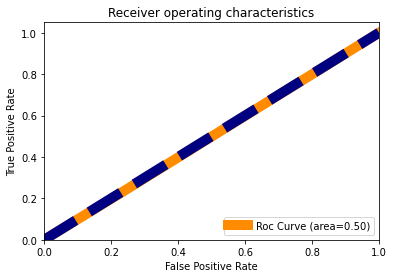

In [138]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [139]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.6344917819086102

# Classification model buliding

In [140]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 26 The model performs very well
At random state:- 26
Training score is:- 76.39742014742015
Testing score is:- 76.42813267813267
At random state 31 The model performs very well
At random state:- 31
Training score is:- 76.41661547911548
Testing score is:- 76.35135135135135
At random state 61 The model performs very well
At random state:- 61
Training score is:- 76.41277641277642
Testing score is:- 76.36670761670761
At random state 67 The model performs very well
At random state:- 67
Training score is:- 76.39358108108108
Testing score is:- 76.44348894348894
At random state 81 The model performs very well
At random state:- 81
Training score is:- 76.40509828009829
Testing score is:- 76.39742014742015
At random state 86 The model performs very well
At random state:- 86
Training score is:- 76.39358108108108
Testing score is:- 76.42813267813267
At random state 88 The model performs very well
At random state:- 88
Training score is:- 76.39742014742015
Testing score is:- 76.4127764

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=164,test_size=0.20)

In [142]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred_test=mnb.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7641277641277642
[[4944    1]
 [1535   32]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      4945
           1       0.97      0.02      0.04      1567

    accuracy                           0.76      6512
   macro avg       0.87      0.51      0.45      6512
weighted avg       0.81      0.76      0.67      6512



# Cross-validation for MultinomialNB

In [143]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 76.40356265356264
accuracy_score is :- 76.41277641277642


At cv:- 3
Cross validation score is:- 76.40356260904889
accuracy_score is :- 76.41277641277642


At cv:- 4
Cross validation score is:- 76.40356265356264
accuracy_score is :- 76.41277641277642


At cv:- 5
Cross validation score is:- 76.40356265356264
accuracy_score is :- 76.41277641277642


At cv:- 6
Cross validation score is:- 76.40356473945319
accuracy_score is :- 76.41277641277642


At cv:- 7
Cross validation score is:- 76.4035632353876
accuracy_score is :- 76.41277641277642


At cv:- 8
Cross validation score is:- 76.40356265356266
accuracy_score is :- 76.41277641277642


At cv:- 9
Cross validation score is:- 76.40356007773825
accuracy_score is :- 76.41277641277642




In [144]:
print("At cv:-",3)
print("Cross validation score is:-",76.40 )
print("Accuracy_score is :-",76.41)

At cv:- 3
Cross validation score is:- 76.4
Accuracy_score is :- 76.41


# Auc Roc Curve

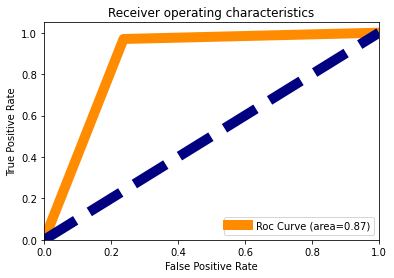

In [145]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [146]:
svc=SVC(kernel='rbf')
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    svc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 8 The model performs very well
At random state:- 8
Training score is:- 81.87192874692875
Testing score is:- 81.89496314496314
At random state 11 The model performs very well
At random state:- 11
Training score is:- 81.84505528255528
Testing score is:- 81.75675675675676
At random state 14 The model performs very well
At random state:- 14
Training score is:- 81.7644348894349
Testing score is:- 81.80282555282555
At random state 21 The model performs very well
At random state:- 21
Training score is:- 81.75675675675676
Testing score is:- 81.77211302211302


KeyboardInterrupt: 

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=14,test_size=0.20)

In [148]:
def svmkernel(ker):
    svc=SVC(kernel=ker)  
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_test=svc.predict(x_test)
    print(accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))


In [149]:
svmkernel('rbf')

0.8180282555282555
[[4790  144]
 [1041  537]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4934
           1       0.79      0.34      0.48      1578

    accuracy                           0.82      6512
   macro avg       0.81      0.66      0.68      6512
weighted avg       0.81      0.82      0.79      6512



# Cross-validation for SVM for rbf kernel

In [150]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,10):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 81.68611793611792
accuracy_score is :- 82.21744471744472


At cv:- 3
Cross validation score is:- 81.79668848308053
accuracy_score is :- 82.21744471744472


At cv:- 4
Cross validation score is:- 81.84582309582309
accuracy_score is :- 82.21744471744472


At cv:- 5
Cross validation score is:- 81.76289926289927
accuracy_score is :- 82.21744471744472


At cv:- 6
Cross validation score is:- 81.83047405122616
accuracy_score is :- 82.21744471744472


At cv:- 7
Cross validation score is:- 81.86733401840297
accuracy_score is :- 82.21744471744472




KeyboardInterrupt: 

In [151]:
print("At cv:-",4)
print("Cross validation score is:-",81.845)
print("Accuracy_score is :-",81.217)

At cv:- 4
Cross validation score is:- 81.845
Accuracy_score is :- 81.217


In [152]:
svmkernel('linear')

0.8065110565110565
[[4781  153]
 [1107  471]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4934
           1       0.75      0.30      0.43      1578

    accuracy                           0.81      6512
   macro avg       0.78      0.63      0.66      6512
weighted avg       0.80      0.81      0.77      6512



In [153]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7024339680589681
0.6965601965601965
[[4362  572]
 [1404  174]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      4934
           1       0.23      0.11      0.15      1578

    accuracy                           0.70      6512
   macro avg       0.49      0.50      0.48      6512
weighted avg       0.63      0.70      0.65      6512



# Cross-validation for SVM for linear kernel

In [154]:
from sklearn.model_selection import cross_val_score
pred_svc = svc.predict(x_test)

svccs= accuracy_score(y_test,pred_svc)
for j in range(2,5):
    svcscore = cross_val_score(svc,x,y,cv=j)
    svcc = svcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",svcc*100 )
    print("accuracy_score is :-",svccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 81.68611793611792
accuracy_score is :- 82.21744471744472


At cv:- 3
Cross validation score is:- 81.79668848308053
accuracy_score is :- 82.21744471744472


At cv:- 4
Cross validation score is:- 81.84582309582309
accuracy_score is :- 82.21744471744472




In [160]:
print("At cv:-",4)
print("Cross validation score is:-",81.845)
print("Accuracy_score is :-", 82.217)

At cv:- 4
Cross validation score is:- 81.845
Accuracy_score is :- 82.217


In [165]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [166]:
svcr = SVC(C=10, kernel='rbf')
svcr.fit(x_train,y_train)
svcr.score(x_train,y_train)
pred_svcr = svcr.predict(x_test)

svcsr = accuracy_score(y_test,pred_svcr)
print('Accuracy Score:',svcsr*100)

svcrscore = cross_val_score(svcr,x,y,cv=4)
svccr = svcrscore.mean() 
print('Cross Val Score:',svccr*100)

Accuracy Score: 83.01597051597052
Cross Val Score: 82.6105651105651


# Auc roc curve for SVM with 'linear' kernel

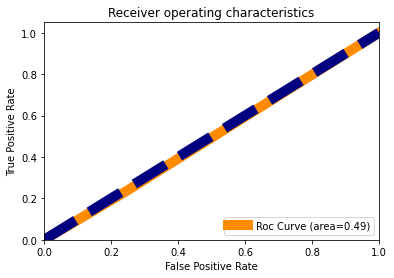

In [167]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [168]:
dtc=DecisionTreeClassifier()
for i in range(1,1500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [169]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [170]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8131142506142506
0.9999616093366094
[[4334  595]
 [ 622  961]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4929
           1       0.62      0.61      0.61      1583

    accuracy                           0.81      6512
   macro avg       0.75      0.74      0.74      6512
weighted avg       0.81      0.81      0.81      6512



In [171]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,6):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 80.30405405405405
accuracy_score is :- 81.31142506142506


At cv:- 3
Cross validation score is:- 81.07801101851399
accuracy_score is :- 81.31142506142506


At cv:- 4
Cross validation score is:- 80.93673218673219
accuracy_score is :- 81.31142506142506


At cv:- 5
Cross validation score is:- 80.8445945945946
accuracy_score is :- 81.31142506142506




In [172]:
print("At cv:-",3)
print("Cross validation score is:-",81.078)
print("Accuracy_score is :-", 81.311)


At cv:- 3
Cross validation score is:- 81.078
Accuracy_score is :- 81.311


In [173]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=3)
Best parameters are:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 3}
Accuracy score:  0.8535396191646192


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)

In [176]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8209459459459459
[[4457  497]
 [ 669  889]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4954
           1       0.64      0.57      0.60      1558

    accuracy                           0.82      6512
   macro avg       0.76      0.74      0.74      6512
weighted avg       0.81      0.82      0.82      6512



In [177]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,6):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 82.21437346437345
accuracy_score is :- 82.0945945945946


At cv:- 3
Cross validation score is:- 82.50615360326181
accuracy_score is :- 82.0945945945946


At cv:- 4
Cross validation score is:- 82.28501228501229
accuracy_score is :- 82.0945945945946


At cv:- 5
Cross validation score is:- 82.35257985257986
accuracy_score is :- 82.0945945945946




In [178]:
print("At cv:-",5)
print("Cross validation score is:-",82.352)
print("Accuracy_score is :-", 82.094)

At cv:- 5
Cross validation score is:- 82.352
Accuracy_score is :- 82.094


# Auc Roc Curve

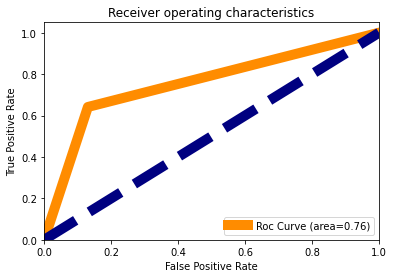

In [179]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [180]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.6499155405405406
testing Accuracy= 0.8209459459459459
[[4457  497]
 [ 669  889]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4954
           1       0.64      0.57      0.60      1558

    accuracy                           0.82      6512
   macro avg       0.76      0.74      0.74      6512
weighted avg       0.81      0.82      0.82      6512



In [181]:
rf=RandomForestClassifier(max_features=.3,max_depth=500,n_estimators=100)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

rfcs= accuracy_score(y_test,pred_rf)
for j in range(2,6):
    rfscore = cross_val_score(rf,x,y,cv=j)
    rfc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",rfc*100 )
    print("accuracy_score is :-",rfcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.46683046683047
accuracy_score is :- 85.35012285012284


At cv:- 3
Cross validation score is:- 85.6603317395887
accuracy_score is :- 85.35012285012284


At cv:- 4
Cross validation score is:- 85.61732186732188
accuracy_score is :- 85.35012285012284


At cv:- 5
Cross validation score is:- 85.55282555282554
accuracy_score is :- 85.35012285012284




In [182]:
print("At cv:-",2)
print("Cross validation score is:-",85.466)
print("Accuracy_score is :-", 85.350)

At cv:- 2
Cross validation score is:- 85.466
Accuracy_score is :- 85.35


In [183]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("training Accuracy=",accuracy_score(y_train,pred_train))
print("testing Accuracy=",accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

training Accuracy= 0.6499155405405406
testing Accuracy= 0.8209459459459459
[[4457  497]
 [ 669  889]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4954
           1       0.64      0.57      0.60      1558

    accuracy                           0.82      6512
   macro avg       0.76      0.74      0.74      6512
weighted avg       0.81      0.82      0.82      6512



In [184]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)

adcs= accuracy_score(y_test,pred_ad)
for j in range(2,10):
    adscore = cross_val_score(ad,x,y,cv=j)
    adc = rfscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",adc*100 )
    print("accuracy_score is :-",adcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 3
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 4
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 5
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 6
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 7
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 8
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877


At cv:- 9
Cross validation score is:- 85.55282555282554
accuracy_score is :- 86.27149877149877




In [185]:
print("At cv:-",5)
print("Cross validation score is:-",88.552)
print("Accuracy_score is :-", 86.271)

At cv:- 5
Cross validation score is:- 88.552
Accuracy_score is :- 86.271


# Auc Roc Curve for Ada Boost Classifier

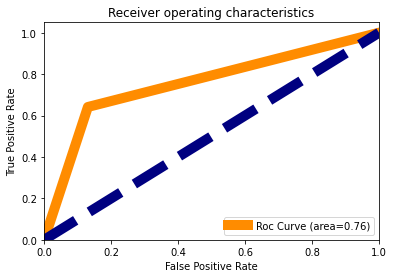

In [188]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc Curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color='navy',lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [186]:
from sklearn.metrics import f1_score
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='macro')
knn_f1=f1_score(y_true, pred_knn, average='macro')
svcr_f1=f1_score(y_true, pred_svcr, average='macro')
mnb_f1=f1_score(y_true, pred_mnb, average='macro')
rf_f1=f1_score(y_true, pred_rf, average='macro')
ad_f1=f1_score(y_true, pred_ad, average='macro')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.7441328071083506
knn f1 score 0.7441328071083506
svcr f1 score 0.4924126255254897
mnb f1 score 0.4347167216889502
rf f1 score 0.7889201250078997
ad f1 score 0.7997275451820907


In [187]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')
svcr_f1=f1_score(y_true, pred_svcr, average='weighted')
mnb_f1=f1_score(y_true, pred_mnb, average='weighted')
rf_f1=f1_score(y_true, pred_rf, average='weighted')
ad_f1=f1_score(y_true, pred_ad, average='weighted')


print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)
print("svcr f1 score",svcr_f1)
print("mnb f1 score",mnb_f1)
print("rf f1 score",rf_f1)
print("ad f1 score",ad_f1)

dtc f1 score 0.8172430704190216
knn f1 score 0.8172430704190216
svcr f1 score 0.6560654403081388
mnb f1 score 0.65748759202989
rf f1 score 0.8498078061470847
ad f1 score 0.858299657679823


# The best model is AdaBoostClassifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum and f1 score is also good in all other model.

Cross validation score is:- 88.552
    
Accuracy_score is :- 86.271

# Model Saving

In [189]:
import pickle
filename = 'inhouse_census_income.pkl'
pickle.dump(ad, open(filename, 'wb'))

# Conclusion

In [190]:
import numpy as np
a=np.array(y_test)
a

array([0, 0, 0, ..., 0, 0, 1])

In [191]:
predicted=np.array(svcr.predict(x_test))
predicted

array([0, 0, 0, ..., 0, 0, 1])

In [192]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
6507,0,0
6508,0,0
6509,0,0
6510,0,0


# From the above table the model is predicted the values with 86 percent accuracy
​